<a href="https://colab.research.google.com/github/hyeonyeongjung/2024-1-my-BDA/blob/main/GG/%EC%A7%80%EC%A7%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%B4%9D%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적 데이터 분석 <지진 관련 데이터>

- title: 지진에 붙은 제목 이름
- magnitude: 지진의 규모
- date_time: 날짜 및 시간
- cdi: 이벤트 범위에 대해 보고된 최대 강도
- mmi: 이벤트에 대한 최대 추정 기기 강도
- alert: 경고 수준 - "녹색", "노란색", "주황색", "빨간색"
- tsunami(쓰나미): 해양 지역에서 발생하는 사건의 경우 "1", 그렇지 않은 경우 "0"

- sig: 이벤트의 중요성을 설명하는 숫자입니다. 숫자가 클수록 더 중요한 이벤트를 나타냅니다. 이 값은 크기, 최대 MMI, 펠트 보고서 및 예상 영향을 포함한 여러 요소에 따라 결정됩니다.
- net: 데이터 기여자의 ID입니다. 이 이벤트에 대한 기본 정보 소스로 간주되는 네트워크를 식별합니다.
- nst: 지진 위치를 결정하는 데 사용되는 지진 관측소의 총 수입니다.
- dmin : 진앙에서 가장 가까운 관측소까지의 수평거리
- 간격(gap): 방위상으로 인접한 측점 사이의 최대 방위각 간격(도 단위)입니다. 일반적으로 이 숫자가 작을수록 계산된 지진의 수평 위치가 더 신뢰할 수 있습니다. 방위각 간격이 180도를 초과하는 지진 위치는 일반적으로 위치 및 깊이 불확실성이 큽니다.
- magType: 이벤트의 선호 크기를 계산하는 데 사용되는 방법 또는 알고리즘
- depth(깊이): 지진이 파열되기 시작하는 깊이
- latitude / longitude(위도/경도): 지구 표면의 어떤 장소의 위치나 위치를 결정하고 설명할 수 있는 좌표계
- location(위치): 해당 국가 내 위치
- continent(대륙) : 지진 피해국의 대륙
- country(국가): 영향을 받은 국가



### 데이터 전처리

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.4 MB/s eta 0:00:00


In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐

In [ ]:
plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df = pd.read_csv('./earthquake_1995-2023.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df.describe(include="all")

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
count,1000,1000.00,1000,1000.00,1000.00,449,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000,1000.00,1000.00,1000.00,994,284,651
unique,984,NaN,990,NaN,NaN,4,NaN,NaN,11,NaN,NaN,NaN,9,NaN,NaN,NaN,502,6,56
top,"M 6.5 - Kermadec Islands, New Zealand",NaN,11-01-2022 12:39,NaN,NaN,green,NaN,NaN,us,NaN,NaN,NaN,mww,NaN,NaN,NaN,"Kokopo, Papua New Guinea",Asia,Indonesia
freq,3,NaN,3,NaN,NaN,353,NaN,NaN,960,NaN,NaN,NaN,502,NaN,NaN,NaN,29,137,140
mean,NaN,6.94,NaN,3.60,6.03,NaN,0.33,847.91,NaN,193.92,1.13,20.93,NaN,74.61,4.32,51.49,NaN,NaN,NaN
std,NaN,0.44,NaN,3.33,1.43,NaN,0.47,301.80,NaN,239.05,2.07,24.42,NaN,130.81,26.63,117.48,NaN,NaN,NaN
min,NaN,6.50,NaN,0.00,1.00,NaN,0.00,650.00,NaN,0.00,0.00,0.00,NaN,2.70,-61.85,-179.97,NaN,NaN,NaN
25%,NaN,6.60,NaN,0.00,5.00,NaN,0.00,691.00,NaN,0.00,0.00,0.00,NaN,16.00,-13.52,-71.69,NaN,NaN,NaN
50%,NaN,6.80,NaN,4.00,6.00,NaN,0.00,744.00,NaN,0.00,0.00,18.00,NaN,29.00,-2.44,107.79,NaN,NaN,NaN
75%,NaN,7.10,NaN,7.00,7.00,NaN,1.00,874.25,NaN,403.00,1.55,27.00,NaN,55.00,25.17,148.36,NaN,NaN,NaN


In [ ]:
df.count()

title        1000
magnitude    1000
date_time    1000
cdi          1000
mmi          1000
alert         449
tsunami      1000
sig          1000
net          1000
nst          1000
dmin         1000
gap          1000
magType      1000
depth        1000
latitude     1000
longitude    1000
location      994
continent     284
country       651
dtype: int64

In [ ]:
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

### 최대강도(cdi)에 따른 경고 수준(alert)

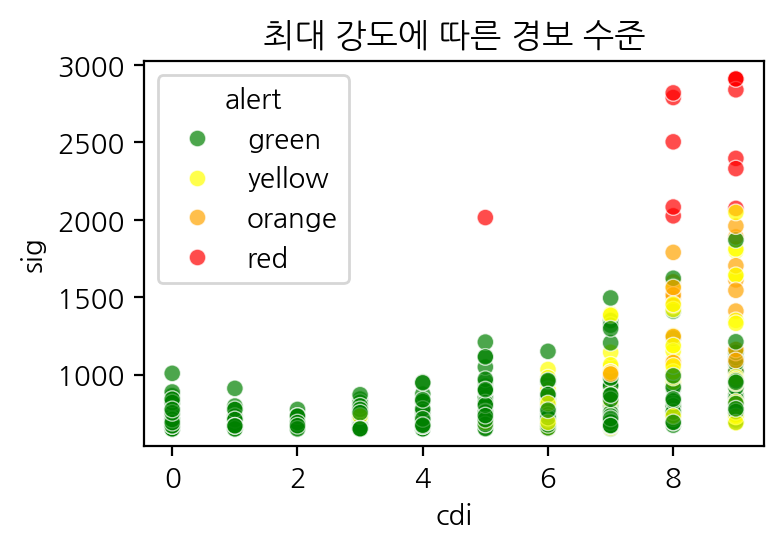

In [ ]:
# 방법1
palette = {'green': 'green', 'yellow': 'yellow', 'orange': 'orange', 'red': 'red'}
sns.scatterplot(data=df, x='cdi', y = 'sig', hue='alert', palette=palette, alpha=0.7)
plt.title('최대 강도에 따른 경보 수준')
plt.show()

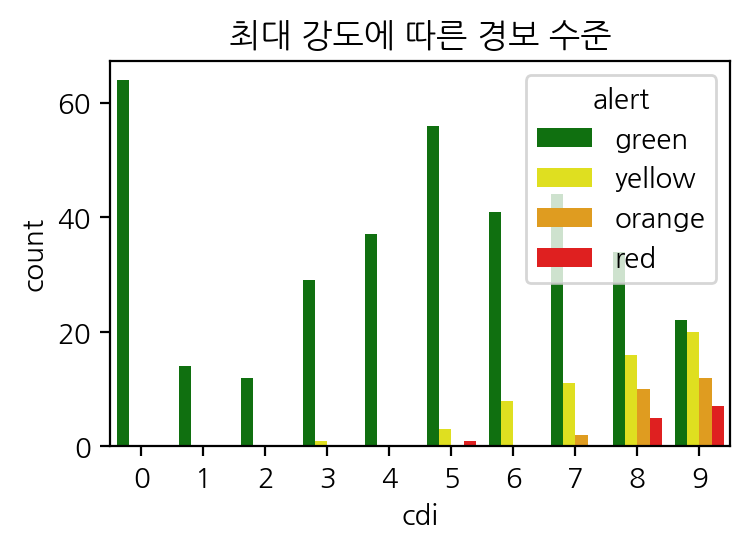

In [ ]:
# 방법2
from pandas.api.types import CategoricalDtype

alert_order = CategoricalDtype(['green', 'yellow', 'orange', 'red'], ordered=True)
df['alert'] = df['alert'].astype(alert_order)

sns.countplot(data=df, x='cdi', hue='alert', palette=palette)
plt.title('최대 강도에 따른 경보 수준')
plt.show()

### 연도, 월 별 지진 발생 횟수

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month

yearly_counts = df['Year'].value_counts().sort_index()
print("연도별 지진 발생 횟수:\n", yearly_counts)

monthly_counts = df['Month'].value_counts().sort_index()
print("\n월별 지진 발생 횟수:\n", monthly_counts)

연도별 지진 발생 횟수:
 Year
1995    29
1996    35
1997    28
1998    23
1999    33
2000    35
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    41
2023    34
Name: count, dtype: int64

월별 지진 발생 횟수:
 Month
1      85
2      79
3      81
4      95
5      81
6      57
7      77
8      85
9      92
10     90
11    107
12     71
Name: count, dtype: int64


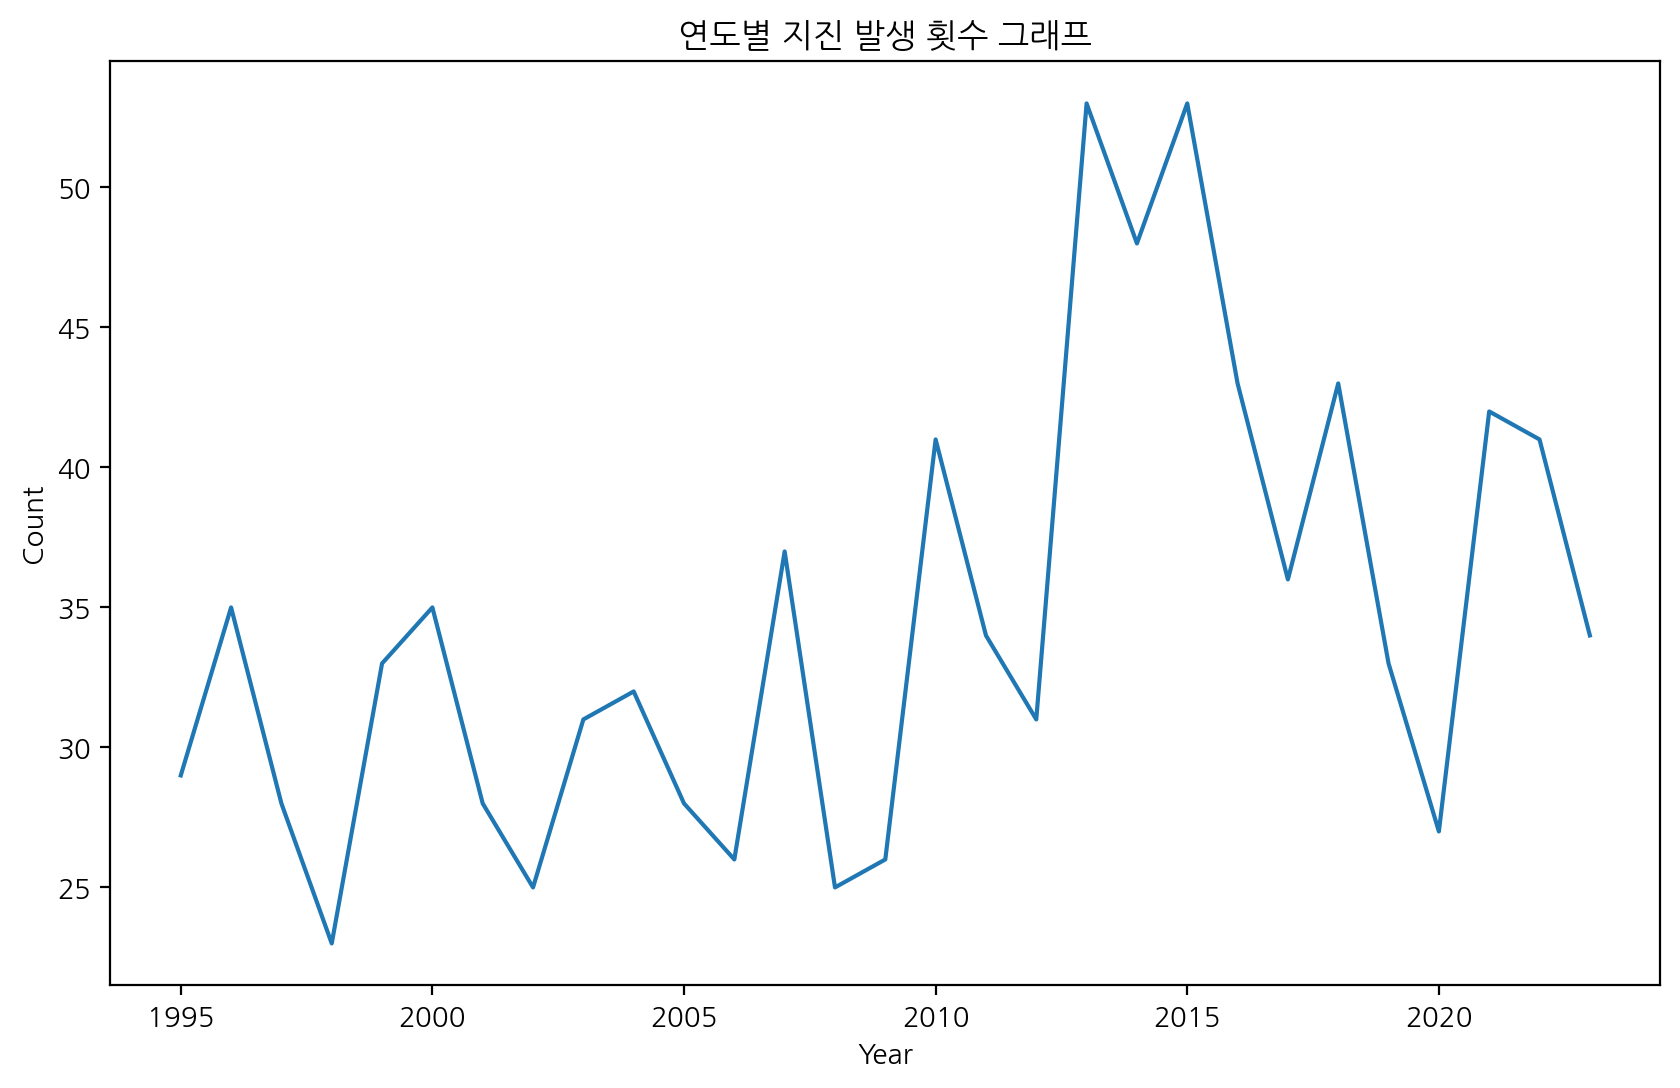

In [ ]:
# 연도별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts)
plt.title('연도별 지진 발생 횟수 그래프')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

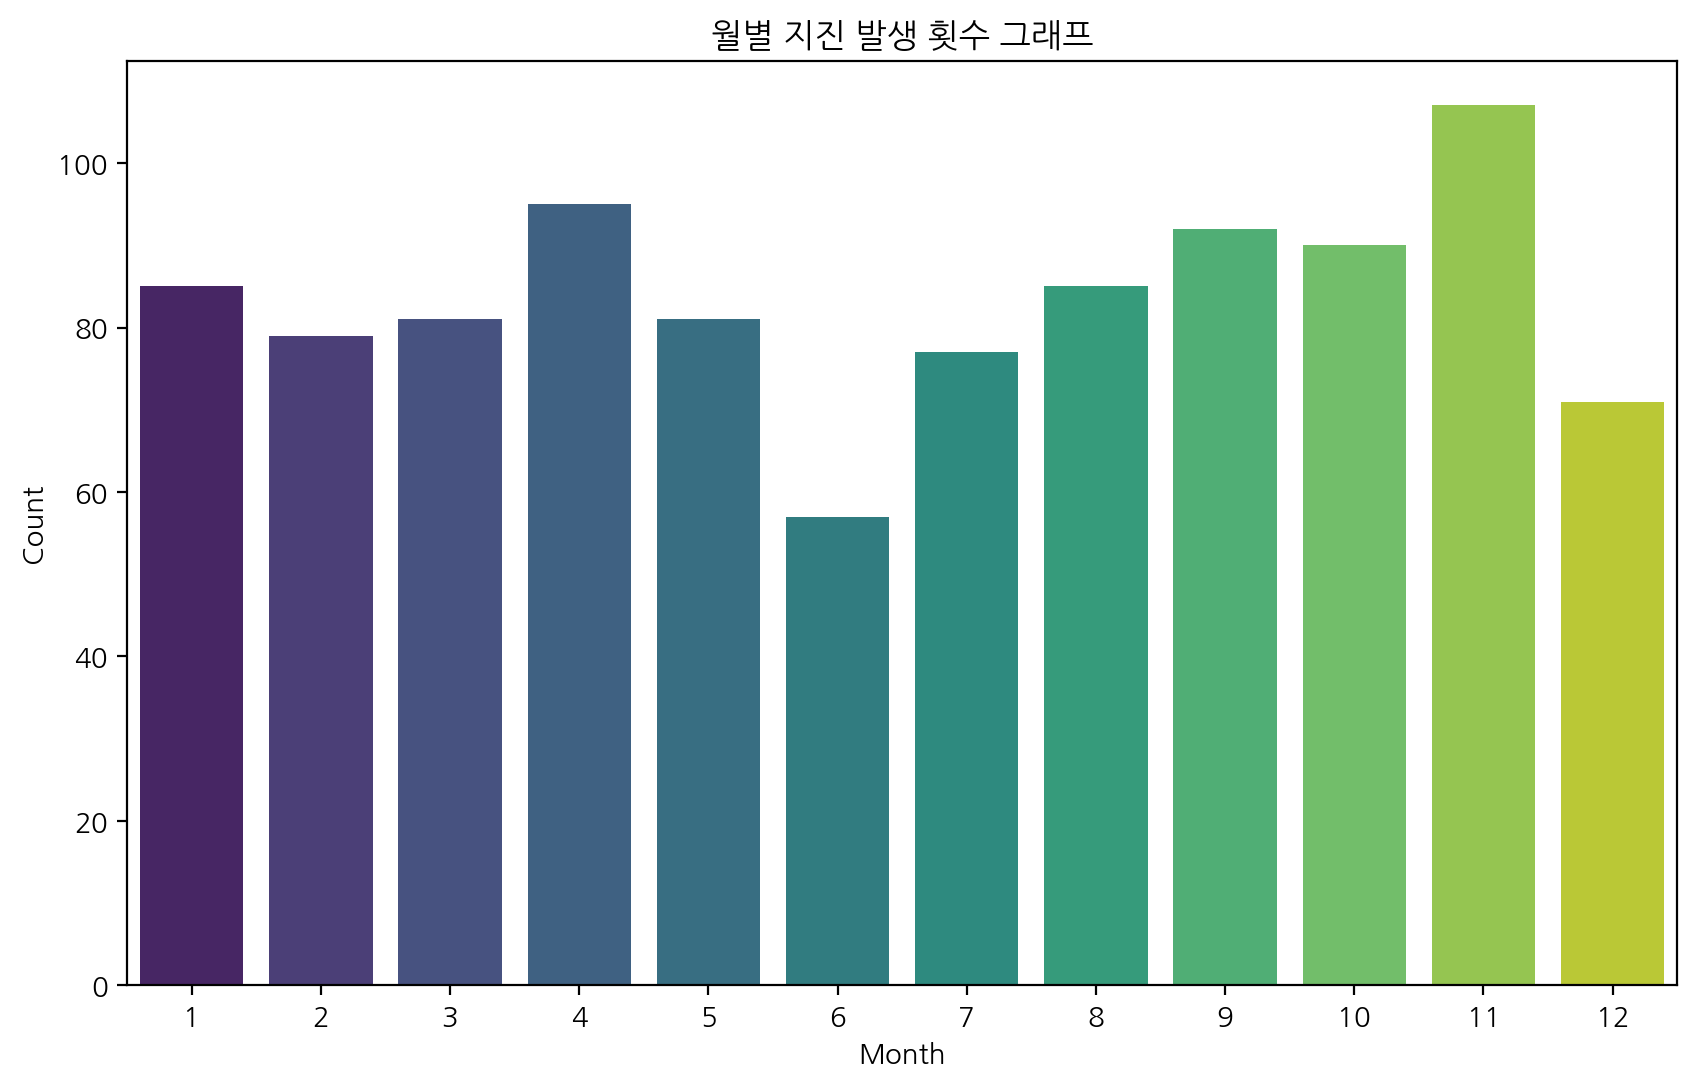

In [ ]:
# 월별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('월별 지진 발생 횟수 그래프')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
df['location'] = df['location'].str.split(', ').str[-1]
s = df['location'].value_counts().sort_values(ascending=False).reset_index()
top_15 = s.iloc[:15, 0].to_list()
s['location'] = s['location'].apply(lambda x: 'Other' if x not in top_15 else x)
s = s.groupby('location').agg('sum').reset_index().sort_values(by='count', ascending=False)

pull = [0] * len(s)
for i in range(4):
    pull[i] = 0.14

gradient = ['#D81159', '#EA320D', '#D70F0F', '#EE5622',
            '#F18805', '#F0A202', '#F0F600', '#ECA72C',
            '#C37D92', '#8F3985', '#8F2D56', '#D88C9A',
            '#FF729F', '#A4036F', '#A675A1', '#8A1C7C']

fig2 = px.pie(s, names='location', values='count', title='국가별/지역별 발생하는 진동 빈도', color_discrete_sequence=gradient)
fig2.update_traces(hole=0.3, pull=pull)
fig2.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)
fig2.show()

In [ ]:
df['magnitude'] = df['magnitude'].astype(int)

In [ ]:
magnitude_stats = df['magnitude'].describe()
print("\n지진 규모 통계값:\n", magnitude_stats)


지진 규모 통계값:
 count    1000.00
mean        6.41
std         0.56
min         6.00
25%         6.00
50%         6.00
75%         7.00
max         9.00
Name: magnitude, dtype: float64


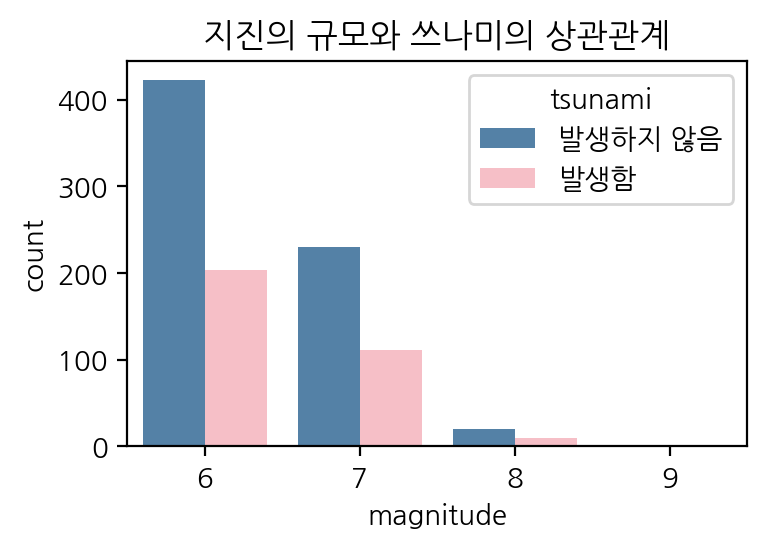

In [ ]:
df['tsunami'] = df['tsunami'].replace({0: '발생하지 않음', 1: '발생함'})

palette2 = ["#4682B4", "#FFB6C1"]
sns.countplot(data=df, x='magnitude', hue='tsunami', palette=palette2)
plt.title('지진의 규모와 쓰나미의 상관관계')
plt.show()

In [ ]:
df['tsunami'] = df['tsunami'].replace({'발생하지 않음': 0, '발생함': 1})

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )


    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}],
    )

    return fig

In [ ]:
# 지진 위치 및 규모 시각화
df['power'] = pow(10, df['magnitude']) / pow(3, df['magnitude'])
df['power'] = df['power'].round(0)

fig = make_world_fig(df, 'latitude', 'longitude', 'magnitude', 'power', ["red"], 1.5, 500)
fig.show()

In [ ]:
# 쓰나미 위치 및 영향 시각화
tsun = df[df['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["#87CEEB"], 1.5, 500)
fig.show()

In [ ]:
# 위 그래프 두개를 합쳐 상관관계 시각화
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

def make_world_fig(data1, lat1, lon1, hover_name1, size1, cl_disc_seq1,
                   data2, lat2, lon2, hover_name2, size2, cl_disc_seq2,
                   zoom, height):
    fig = px.scatter_mapbox(data1, lat=lat1, lon=lon1,
        hover_name=hover_name1,
        size=size1,
        color_discrete_sequence=cl_disc_seq1,
        zoom=zoom, height=height
    )

    fig.add_trace(px.scatter_mapbox(data2, lat=lat2, lon=lon2,
        hover_name=hover_name2,
        size=size2,
        color_discrete_sequence=cl_disc_seq2,
        zoom=zoom, height=height
    ).data[0])

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

df['power'] = np.power(10, df['magnitude']) / np.power(3, df['magnitude'])
df['power'] = df['power'].round(0)

tsun = df[df['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["#87CEEB"],
                     df, 'latitude', 'longitude', 'magnitude', 'power', ["red"],
                     1.5, 500)

fig.show()